In [ ]:
import uvicorn
from fastapi import FastAPI

# Binary Classifier for Credit Analysis

In [ ]:
{
  "person_age": 35,
  "person_income": 120000,
  "person_emp_length": 10.0,
  "loan_amnt": 10000,
  "loan_int_rate": 7.5,
  "loan_percent_income": 0.08,
  "cb_person_cred_hist_length": 15,
  "person_home_ownership_MORTGAGE": 1,
  "person_home_ownership_OTHER": 0,
  "person_home_ownership_OWN": 0,
  "person_home_ownership_RENT": 0,
  "loan_intent_DEBTCONSOLIDATION": 0,
  "loan_intent_EDUCATION": 0,
  "loan_intent_HOMEIMPROVEMENT": 1,
  "loan_intent_MEDICAL": 0,
  "loan_intent_PERSONAL": 0,
  "loan_intent_VENTURE": 0,
  "loan_grade_A": 1,
  "loan_grade_B": 0,
  "loan_grade_C": 0,
  "loan_grade_D": 0,
  "loan_grade_E": 0,
  "loan_grade_F": 0,
  "loan_grade_G": 0,
  "cb_person_default_on_file_N": 1,
  "cb_person_default_on_file_Y": 0
}

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [2]:
data = pd.read_csv("data/cr_loan2.csv")
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [3]:
data = pd.read_csv("data/cr_loan2.csv")
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


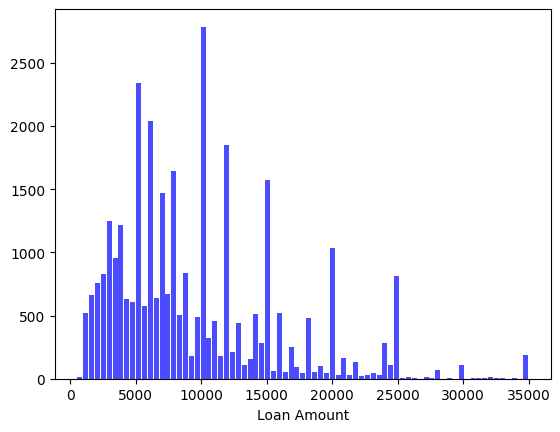

In [5]:
n, bins, patches = plt.hist(x=data['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

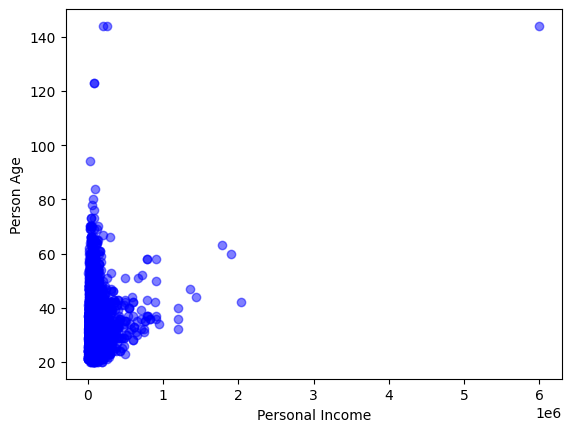

In [6]:
# Plot a scatter plot of income against age
plt.scatter(data['person_income'], data['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()

In [7]:
# Create a cross table of the loan intent and loan status
pd.crosstab(data["loan_intent"], data["loan_status"], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [8]:
# Create a cross table of home ownership, loan status, and grade
pd.crosstab(data["person_home_ownership"],[data["loan_status"],data["loan_grade"]])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [9]:
# Create a cross table of home ownership, loan status, and average percent income
pd.crosstab(data["person_home_ownership"], data["loan_status"], values=data["loan_percent_income"], aggfunc="mean")

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


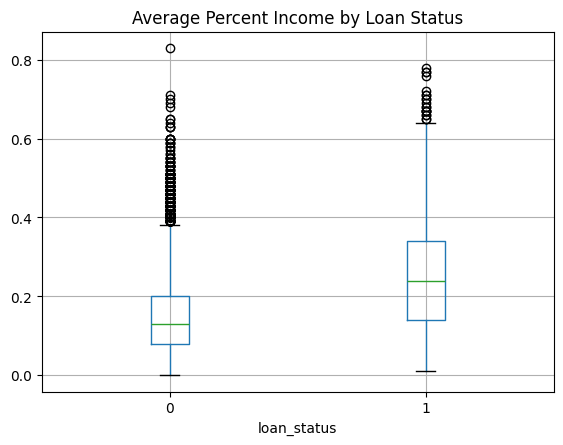

In [10]:
# Create a box plot of percentage income by loan status
data.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

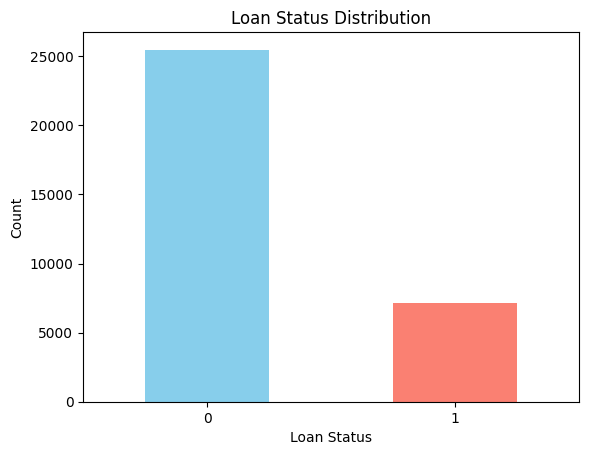

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [11]:
data["loan_status"].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
data["loan_status"].value_counts()

# Preprocessing the data

## Identifying and Dealling with Outliers

In [ ]:
# Create the cross table for loan status, home ownership, and the max employment length
pd.crosstab(data["loan_status"],data["person_home_ownership"], values=data["person_emp_length"], aggfunc="max")

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


In [ ]:
# Create an array of indices where employment length is greater than 60
indices = data[data["person_emp_length"] > 60].index

In [ ]:
# Drop the records from the data based on the indices and create a new dataframe
data = data.drop(indices)

In [ ]:
# Create the cross table from earlier and include minimum employment length
pd.crosstab(data["loan_status"],data["person_home_ownership"], values=data['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

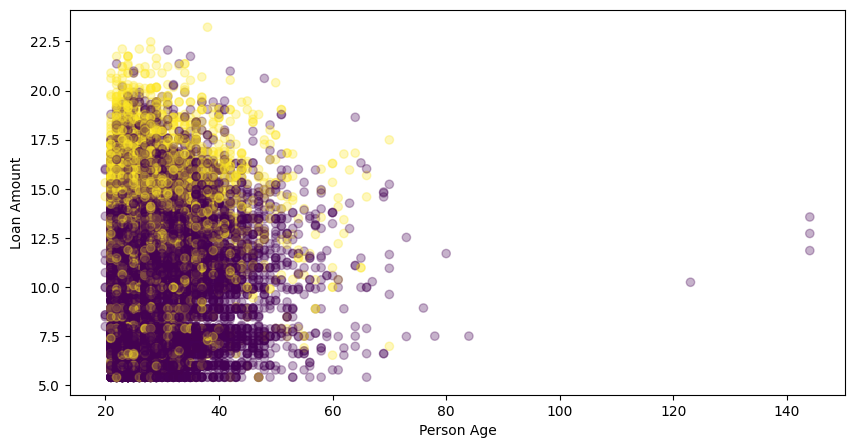

In [ ]:
# Create the scatter plot for age and amount
plt.figure(figsize=(10, 5))
plt.scatter(data["person_age"], data["loan_int_rate"], c = data['loan_status'], alpha=0.3)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

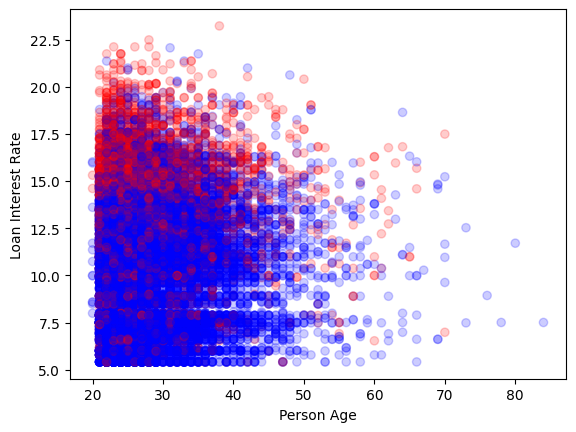

In [ ]:
# Use Pandas to drop the record from the data frame and create a new one
import matplotlib.colors as mcolors  # Importa a biblioteca de cores
data = data.drop(data[data["person_age"] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(data["person_age"], data["loan_int_rate"], c = data['loan_status'],  cmap = mcolors.ListedColormap(colors), alpha=0.2)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

## Dealling with Missing Data

In [ ]:
#Exploring Missing Values
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Print the top five rows with nulls for employment length
data[data['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [ ]:
# Replace the null values with the median value for all employment lengths
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())

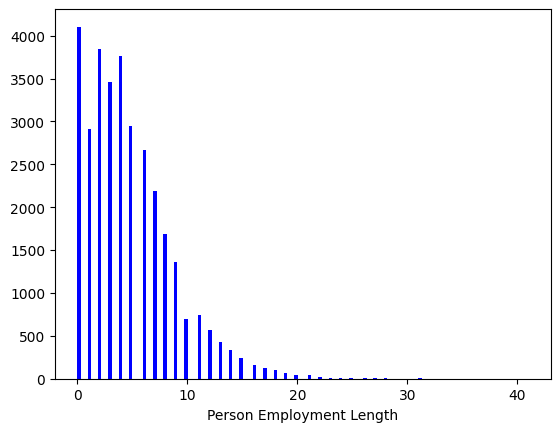

In [ ]:
# Create a histogram of employment length
n, bins, patches = plt.hist(data['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [ ]:
# Store the array on indices
indices = data[data['loan_int_rate'].isnull()].index

# Save the new data without missing data
data = data.drop(indices)

In [ ]:
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
# Create two data sets for numeric and non-numeric data
data_num = data.select_dtypes(exclude=['object'])
data_str = data.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
data_str_onehot = pd.get_dummies(data_str)

# Union the one-hot encoded columns to the numeric ones
data = pd.concat([data_num, data_str_onehot], axis=1)

# Print the columns in the new data set
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,False,...,True,True,False,False,False,False,False,False,True,False


### Heatmap with Correlation

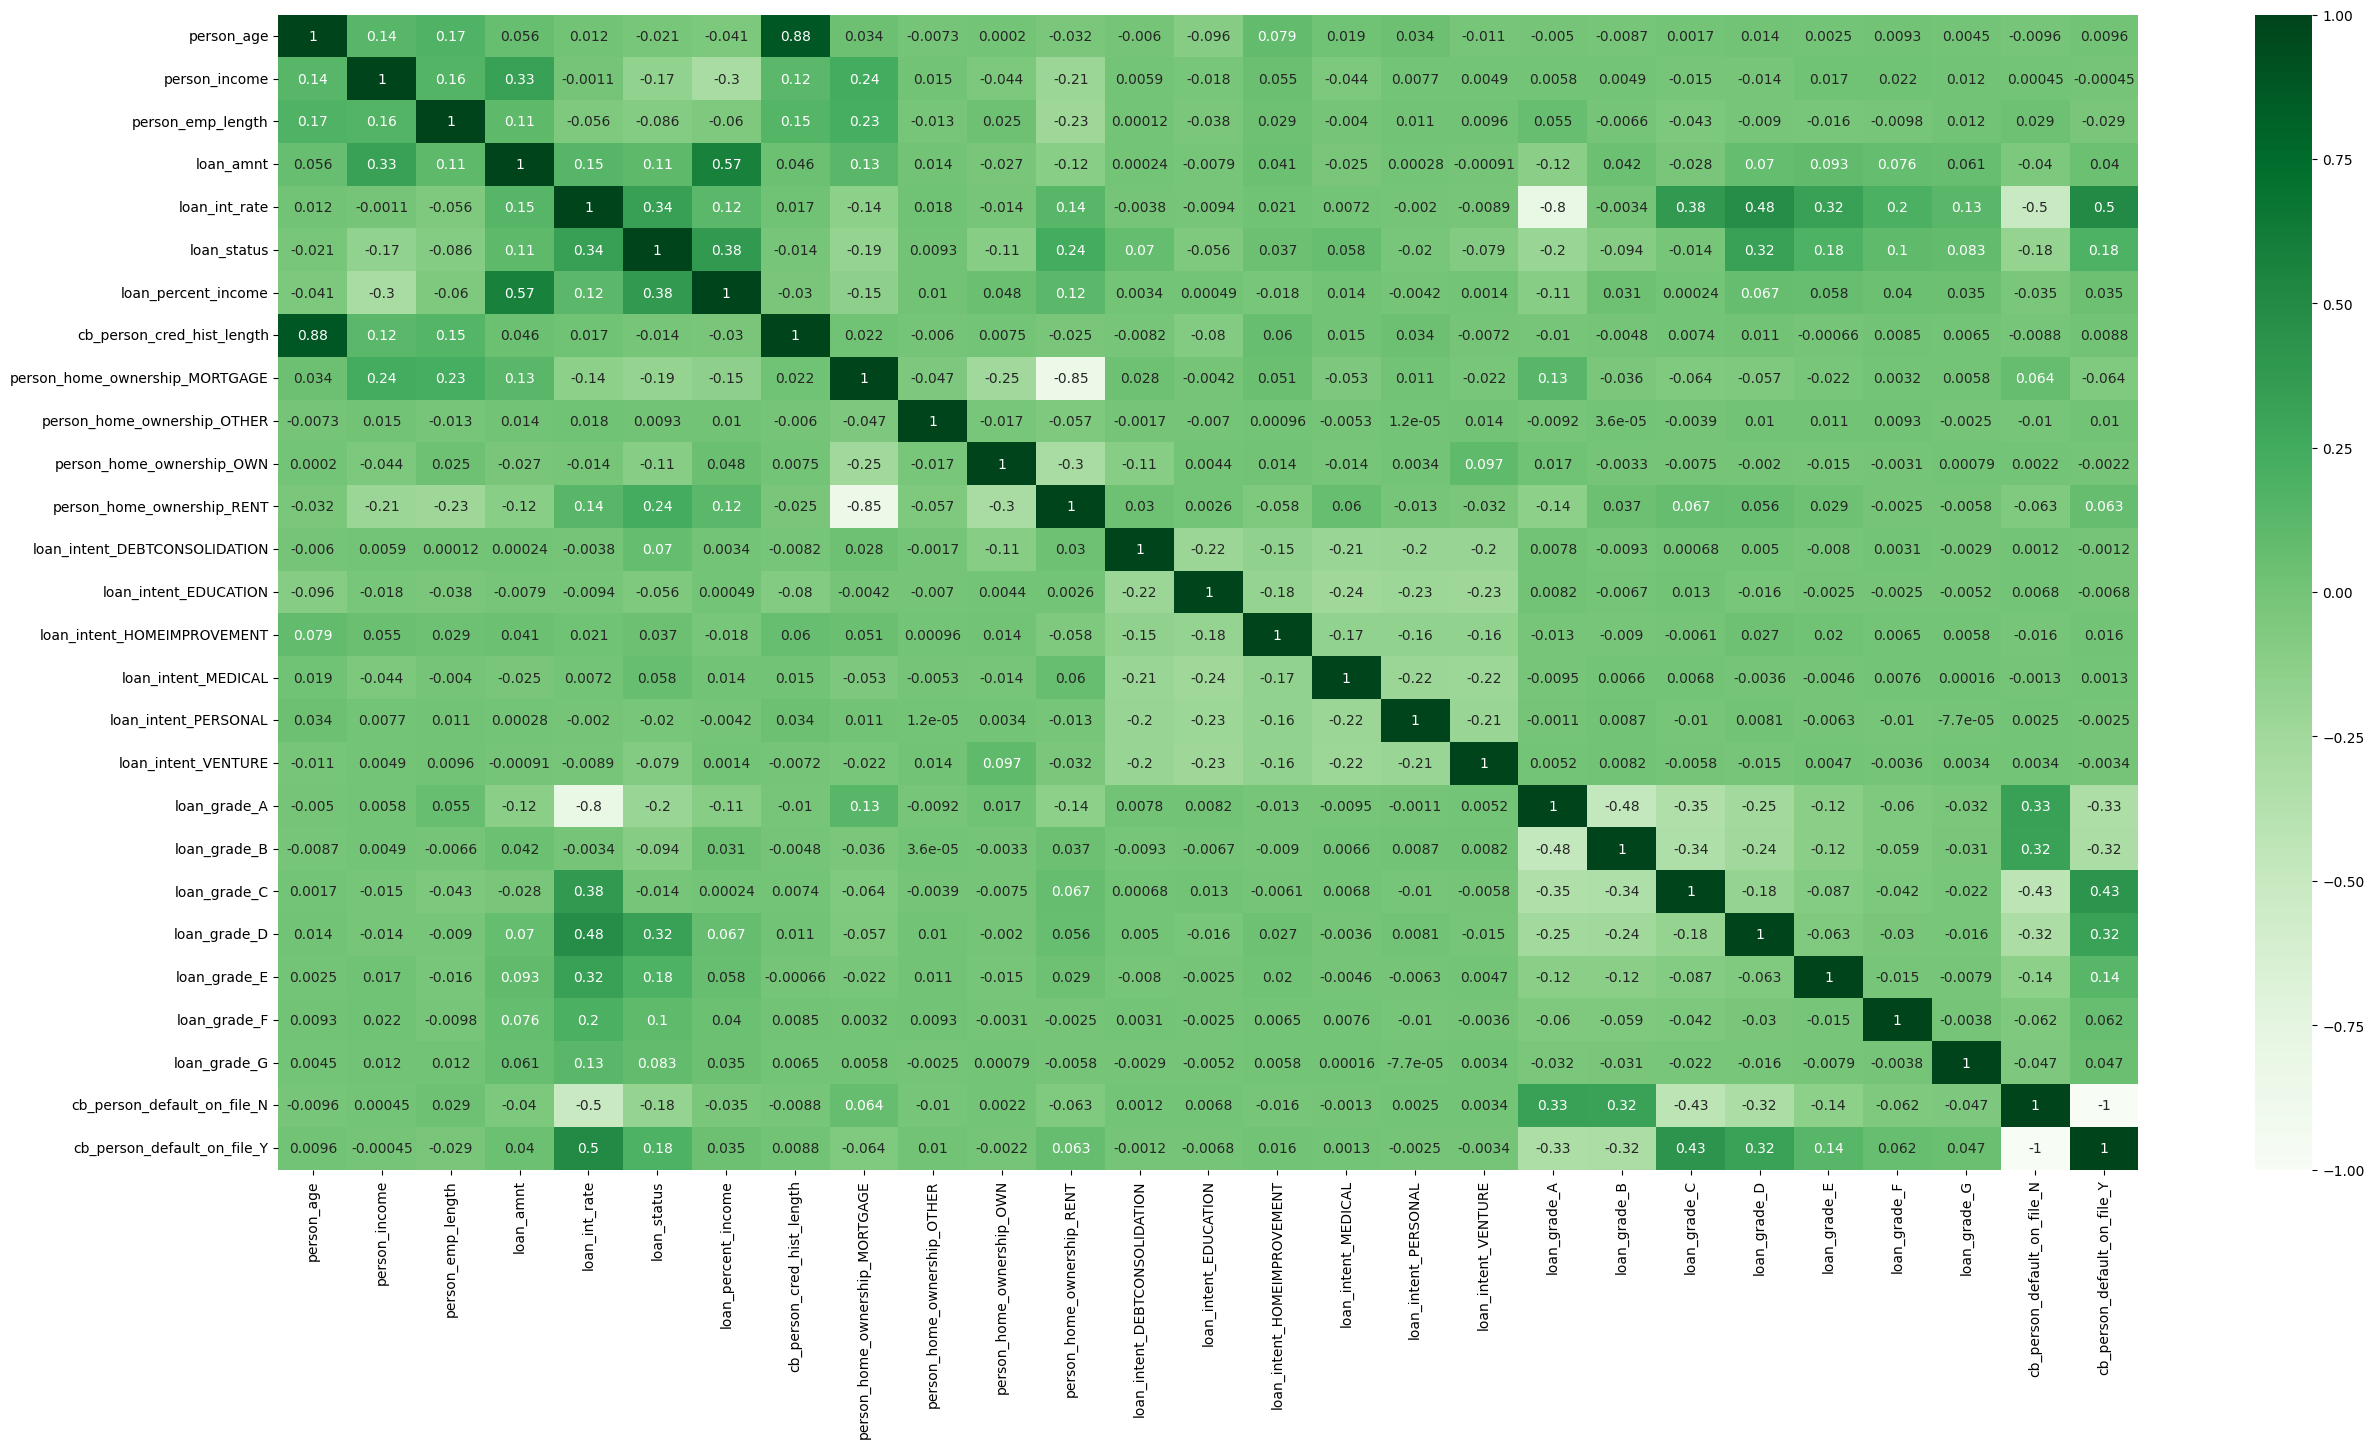

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.show()

# Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
import xgboost as xgb
import pickle

In [ ]:
# Create the X and y data sets
X = data.drop('loan_status', axis=1)
y = data[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [ ]:
X_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
31622,49,45000,2.0,15000,13.49,0.33,12,False,False,False,...,False,False,False,True,False,False,False,False,True,False
24935,34,60500,3.0,11200,15.62,0.19,10,False,False,False,...,False,False,False,False,True,False,False,False,False,True
15342,21,62004,0.0,15000,7.29,0.24,4,False,False,False,...,True,True,False,False,False,False,False,False,True,False
3460,25,68000,9.0,10800,10.74,0.16,2,False,False,False,...,True,False,True,False,False,False,False,False,True,False
16424,23,58800,7.0,3000,10.36,0.05,3,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25231,29,81900,13.0,8000,7.66,0.10,10,True,False,False,...,True,True,False,False,False,False,False,False,True,False
30380,37,89532,9.0,6600,12.53,0.07,12,False,False,False,...,False,False,True,False,False,False,False,False,True,False
29849,37,40000,2.0,16000,10.99,0.40,15,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1780,23,29004,2.0,6000,11.99,0.21,2,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
# Scaler for training and test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_slr = scaler.fit_transform(X_train) # Creating a X_train variable scaled, in order to don't lose the original X_train for future calculations
X_test_slr = scaler.transform(X_test)

with open("preprocessing/scaler.pkl", "wb") as f:
    pickle.dump(scaler,f)

In [ ]:
log_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
knn_clf = KNeighborsClassifier()
grd_clf = GradientBoostingClassifier()
xgb_clf = xgb.XGBClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'
)

## Training and Validation

In [ ]:
# --- First General Avaliation of the Models ---
# Loop to fit, predict and evaluate all different models:

for clf in (log_clf, rnd_clf, svm_clf, knn_clf, grd_clf, xgb_clf, voting_clf):
    clf.fit(X_train_slr, np.ravel(y_train))
    y_pred = clf.predict(X_test_slr)
    print(f"The {clf.__class__.__name__} has an Accuracy: {accuracy_score(y_test, y_pred):.4f} , and a Precision of: {precision_score(y_test, y_pred):.4f} ")

The LogisticRegression has an Accuracy: 0.8674 , and a Precision of: 0.7638 
The RandomForestClassifier has an Accuracy: 0.9288 , and a Precision of: 0.9619 
The SVC has an Accuracy: 0.9079 , and a Precision of: 0.9149 
The KNeighborsClassifier has an Accuracy: 0.8907 , and a Precision of: 0.8489 
The GradientBoostingClassifier has an Accuracy: 0.9218 , and a Precision of: 0.9267 
The XGBClassifier has an Accuracy: 0.9307 , and a Precision of: 0.9394 
The VotingClassifier has an Accuracy: 0.9297 , and a Precision of: 0.9485 


Validation of the LogisticRegression model: 
loan_status
0    9845
1    1939
Name: count, dtype: int64
The Report from LogisticRegression:
              precision    recall  f1-score   support

 Non-Default       0.89      0.95      0.92      9198
     Default       0.76      0.57      0.65      2586

    accuracy                           0.87     11784
   macro avg       0.83      0.76      0.79     11784
weighted avg       0.86      0.87      0.86     11784

The LogisticRegression has an Accuracy: 0.8674, and a Precision of: 0.7638


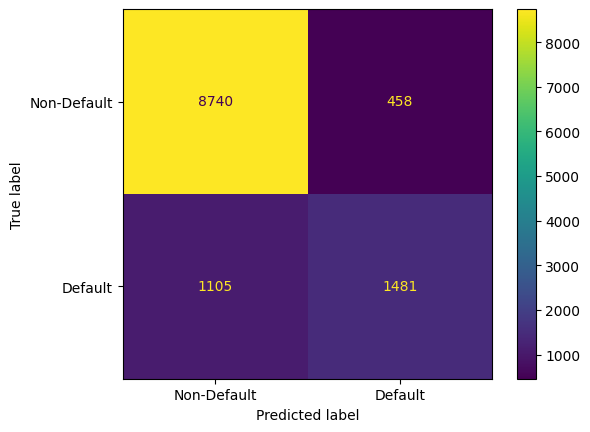

Validation of the RandomForestClassifier model: 
loan_status
0    9876
1    1908
Name: count, dtype: int64
The Report from RandomForestClassifier:
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.96      9198
     Default       0.96      0.71      0.81      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.85      0.88     11784
weighted avg       0.93      0.93      0.92     11784

The RandomForestClassifier has an Accuracy: 0.9289, and a Precision of: 0.9581


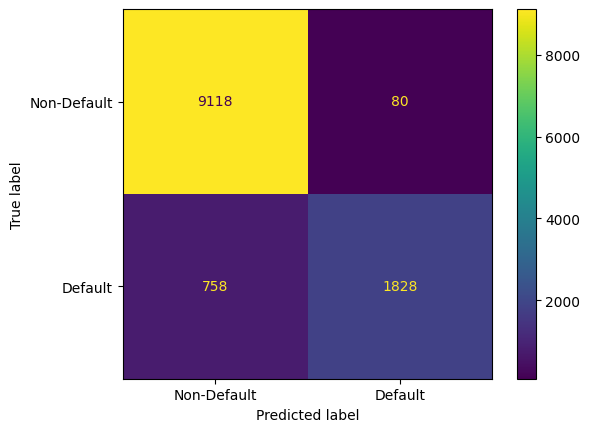

Validation of the XGBClassifier model: 
loan_status
0    9771
1    2013
Name: count, dtype: int64
The Report from XGBClassifier:
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.73      0.82      2586

    accuracy                           0.93     11784
   macro avg       0.93      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

The XGBClassifier has an Accuracy: 0.9307, and a Precision of: 0.9394


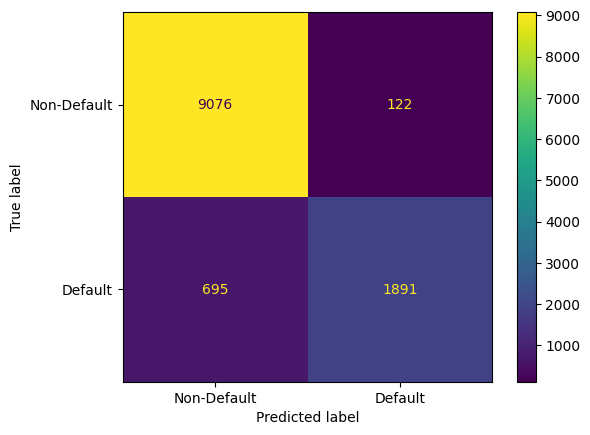

Validation of the VotingClassifier model: 
loan_status
0    9821
1    1963
Name: count, dtype: int64
The Report from VotingClassifier:
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.95      0.72      0.82      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.85      0.89     11784
weighted avg       0.93      0.93      0.93     11784

The VotingClassifier has an Accuracy: 0.9297, and a Precision of: 0.9475


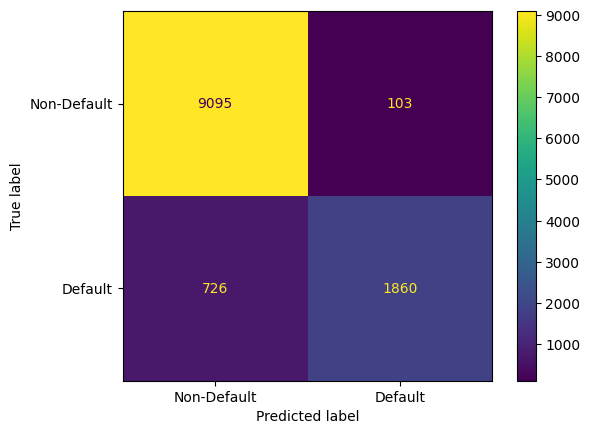

In [ ]:
# Import necessary libraries (assuming they were imported earlier in your script)
colors = ['orange', 'blue', 'green', 'purple', 'red', 'brown']  # Define a list of colors for potential plotting purposes

# Initialize lists to store evaluation metrics for different models
model_name_list = []       # List to store model names for each classifier
fallout_list = []          # List to store False Positive Rate (FPR) for ROC curves
sensitivity_list = []      # List to store True Positive Rate (TPR) for ROC curves
thresholds_list = []       # List to store threshold values from ROC calculation
roc_auc_list = []          # List to store AUC values for each model
preds_df_all = pd.DataFrame()  # DataFrame to consolidate probabilities and predictions for all models

# Loop through the classifiers to fit, predict, and evaluate them
for idx, clf in enumerate((log_clf, rnd_clf, xgb_clf, voting_clf)):  # Iterate through classifiers

    # Store and print the model name
    model_name_list.append(clf.__class__.__name__)  # Append the class name of the current classifier to the model list
    print(f"Validation of the {model_name_list[idx]} model: ")  # Display the current model being validated

    # Fit the current classifier on the training data
    clf.fit(X_train_slr, np.ravel(y_train))  # Train the model with X_train_slr (features) and y_train (target)

    # Predict probabilities for the test data
    preds = clf.predict_proba(X_test_slr)  # Predict class probabilities; `predict_proba` returns probabilities for each class

    # Create a DataFrame to store the probabilities of the positive class (e.g., default)
    preds_df = pd.DataFrame(preds[:, 1], columns=['prob_default'])  # Extract probabilities for the positive class

    # Store the probabilities in a consolidated DataFrame
    preds_df_all[f"prob_default {model_name_list[idx]}"] = preds_df['prob_default']  # Add current model's probabilities to `preds_df_all`

    # --- Assign loan status based on a threshold ---

    # Define a decision threshold
    threshold = 0.5  # Default threshold of 0.5 to classify positive vs negative

    # Assign loan status (predicted class) based on the threshold
    preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > threshold else 0)  # Binary classification

    # Store predicted loan status in the consolidated DataFrame
    preds_df_all[f"loan_status {model_name_list[idx]}"] = preds_df['loan_status']

    # Print the count of each loan status (0 = non-default, 1 = default)
    print(preds_df["loan_status"].value_counts())  # Display class distribution for predicted values

    # --- Classification Report ---

    # Generate and print the classification report
    print(f"The Report from {model_name_list[idx]}:")
    target_names = ['Non-Default', 'Default']  # Define class names for the report
    print(classification_report(y_test, preds_df["loan_status"], target_names=target_names))  # Evaluation metrics

    # Print accuracy and precision metrics
    print(f"The {model_name_list[idx]} has an Accuracy: {accuracy_score(y_test, preds_df['loan_status']):.4f}, "
          f"and a Precision of: {precision_score(y_test, preds_df['loan_status']):.4f}")

    # --- Confusion Matrix ---

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, preds_df['loan_status'])  # Confusion matrix: actual vs predicted values

    class_names = ['Non-Default', 'Default']

    # Plot and display the confusion matrix
    display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)  # Configure the display
    display_cm.plot()  # Plot the confusion matrix
    plt.show()  # Show the plot

    # --- ROC Curve and AUC ---

    # Evaluate the model using ROC-AUC
    prob_default = preds[:, 1]  # Extract probabilities of the positive class

    # Calculate ROC curve metrics: FPR (fallout), TPR (sensitivity), and thresholds
    fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)  # Compute ROC metrics

    # Calculate the Area Under the Curve (AUC) for ROC
    roc_auc = roc_auc_score(y_test, prob_default)  # AUC score for the current model

    # Append the ROC metrics to the respective lists
    fallout_list.append(fallout)  # Store FPR values
    sensitivity_list.append(sensitivity)  # Store TPR values
    thresholds_list.append(thresholds)  # Store thresholds
    roc_auc_list.append(roc_auc)  # Store AUC score


![image.png](attachment:9ed153a6-5a1b-4408-bf12-3728f2aafae7.png)

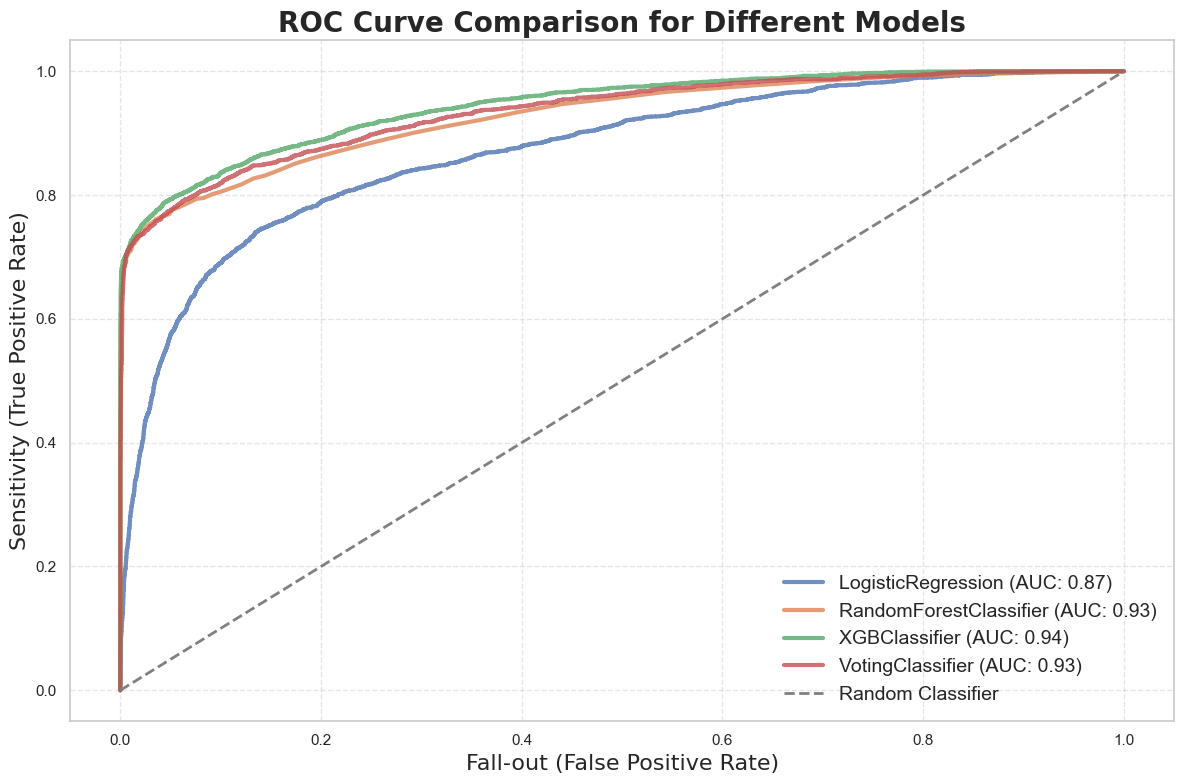

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo para um visual mais suave
sns.set(style="whitegrid")

# Definir uma paleta de cores suaves
colors = sns.color_palette("deep", len(model_name_list))

# --- Plot the ROC Curve for all models with improvements:

# Set the figure size for better clarity
plt.figure(figsize=(12, 8))

# Plot each model's ROC curve with a soft appearance
for idx in range(len(model_name_list)):
    plt.plot(fallout_list[idx], sensitivity_list[idx],
             color=colors[idx], linewidth=3, alpha=0.8, label=f"{model_name_list[idx]} (AUC: {roc_auc_list[idx]:.2f})")

# Plot the diagonal line (random model) with a softer style
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier', linewidth=2)

# Add title with a clean, elegant font style
plt.title("ROC Curve Comparison for Different Models", fontsize=20, fontweight='bold', family='DejaVu Sans')

# Labels with slightly larger font and a clean look
plt.xlabel('Fall-out (False Positive Rate)', fontsize=16, family='DejaVu Sans')
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=16, family='DejaVu Sans')

# Add grid lines with a soft appearance
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend with a cleaner font size and position it better
plt.legend(loc='lower right', fontsize=14, frameon=False, fancybox=True)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
y_test

,loan_status
31622,1
24935,1
15342,0
3460,0
16424,1
...,...
25231,0
30380,0
29849,0
1780,0


In [ ]:
# Concat all True Status Loan and All Prob and Show
# Using test instances

true_df = pd.DataFrame()

true_df["true_loan_status"] = y_test
true_and_pred_df = pd.concat([true_df.reset_index(drop = True), preds_df_all], axis = 1)
true_and_pred_df

,true_loan_status,prob_default LogisticRegression,loan_status LogisticRegression,prob_default RandomForestClassifier,loan_status RandomForestClassifier,prob_default XGBClassifier,loan_status XGBClassifier,prob_default VotingClassifier,loan_status VotingClassifier
0,1,0.646961,1,0.96,1,0.993436,1,0.866799,1
1,1,0.829529,1,0.97,1,0.932854,1,0.910795,1
2,0,0.085742,0,0.02,0,0.000790,0,0.035511,0
3,0,0.057660,0,0.01,0,0.001739,0,0.026466,0
4,1,0.044839,0,0.06,0,0.073660,0,0.062833,0
...,...,...,...,...,...,...,...,...,...
11779,0,0.010808,0,0.00,0,0.000907,0,0.003905,0
11780,0,0.082660,0,0.02,0,0.019198,0,0.053953,0
11781,0,0.541127,1,0.15,0,0.044640,0,0.235256,0
11782,0,0.226433,0,0.13,0,0.195342,0,0.163925,0


In [ ]:
true_and_pred_df = true_and_pred_df[["true_loan_status", "prob_default XGBClassifier", "loan_status XGBClassifier"]]

# Rename te collums:
true_and_pred_df = true_and_pred_df.rename(columns={
    "prob_default XGBClassifier": "prob_default",
    "loan_status XGBClassifier": "pred_loan_status"
})

true_and_pred_df

,true_loan_status,prob_default,pred_loan_status
0,1,0.993436,1
1,1,0.932854,1
2,0,0.000790,0
3,0,0.001739,0
4,1,0.073660,0
...,...,...,...
11779,0,0.000907,0
11780,0,0.019198,0
11781,0,0.044640,0
11782,0,0.195342,0


In [ ]:
pd.DataFrame(X_test)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
31622,49,45000,2.0,15000,13.49,0.33,12,False,False,False,...,False,False,False,True,False,False,False,False,True,False
24935,34,60500,3.0,11200,15.62,0.19,10,False,False,False,...,False,False,False,False,True,False,False,False,False,True
15342,21,62004,0.0,15000,7.29,0.24,4,False,False,False,...,True,True,False,False,False,False,False,False,True,False
3460,25,68000,9.0,10800,10.74,0.16,2,False,False,False,...,True,False,True,False,False,False,False,False,True,False
16424,23,58800,7.0,3000,10.36,0.05,3,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25231,29,81900,13.0,8000,7.66,0.10,10,True,False,False,...,True,True,False,False,False,False,False,False,True,False
30380,37,89532,9.0,6600,12.53,0.07,12,False,False,False,...,False,False,True,False,False,False,False,False,True,False
29849,37,40000,2.0,16000,10.99,0.40,15,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1780,23,29004,2.0,6000,11.99,0.21,2,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

[0.92607677 0.94752929]


# Measure the Impact with XGBClassifier

### Acceptance Rate and using it for trashhold

<Axes: >

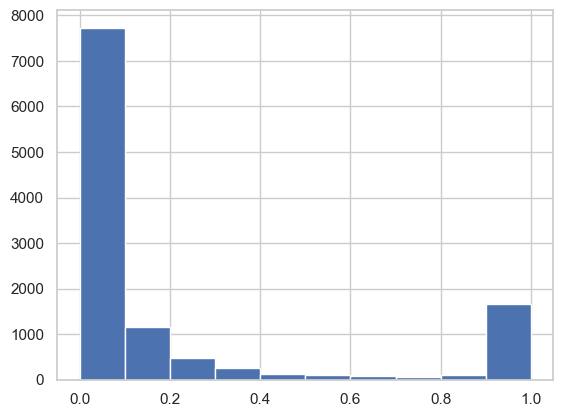

In [ ]:
true_and_pred_df["prob_default"].hist()

In [ ]:
# Using the Acceptance Rate to calculate the Threshold:

# Check the statistics of the probabilities of default
pd.options.display.float_format = '{:.5f}'.format
print(true_and_pred_df["prob_default"].describe())

count   11784.00000
mean        0.21377
std         0.34182
min         0.00000
25%         0.00863
50%         0.04426
75%         0.19359
max         1.00000
Name: prob_default, dtype: float64


In [ ]:
# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(true_and_pred_df["prob_default"], 0.85)
print(threshold_85)

# Apply acceptance rate threshold
true_and_pred_df["pred_loan_status"] = true_and_pred_df["prob_default"].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(true_and_pred_df["pred_loan_status"].value_counts())

0.8022891
pred_loan_status
0    10016
1     1768
Name: count, dtype: int64


## BadRate

In [ ]:
# Create a subset of only accepted loans
accepted_loans = true_and_pred_df[true_and_pred_df["pred_loan_status"] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

0.08286741214057508


In [ ]:
# Print the statistics of the loan amount column
print(X_test['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.mean(X_test['loan_amnt'])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(true_and_pred_df['true_loan_status'], true_and_pred_df['pred_loan_status']).apply(lambda x: x * avg_loan, axis = 0))

count   11784.00000
mean     9556.28394
std      6238.00567
min       500.00000
25%      5000.00000
50%      8000.00000
75%     12000.00000
max     35000.00000
Name: loan_amnt, dtype: float64
pred_loan_status              0              1
true_loan_status                              
0                $87,784,024.31    $114,675.41
1                 $7,931,715.67 $16,780,834.61


In [ ]:
# Set all the acceptance rates to test
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [ ]:
test_pred = pd.DataFrame()
test_pred["prob_default"] = true_and_pred_df["prob_default"]

# Create lists to store thresholds and bad rates
thresholds = []
bad_rates = []
num_accepted_loans = []
avg_loan_amnt = []
estimated_value = []

# Populate the arrays for the strategy table with a for loop
for idx, rate in enumerate(accept_rates):

    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(test_pred["prob_default"], rate).round(3)

    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(test_pred['prob_default'], rate).round(3))

    # Reassign the loan_status value using the threshold
    true_and_pred_df['pred_loan_status'] = true_and_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)

    # Create a set of accepted loans using this acceptance rate
    accepted_loans = true_and_pred_df[true_and_pred_df["pred_loan_status"] == 0]

    # Calculate and append the bad rate using the acceptance rate
    bad_rate = np.sum((accepted_loans["true_loan_status"]) / len(accepted_loans["true_loan_status"])).round(3)
    bad_rates.append(bad_rate)

    num_accepted_loans.append(len(accepted_loans))

    avg_loan_amnt.append(np.mean(X_test["loan_amnt"]))

    #estimated_value.append( ((len(accepted_loans) * (1 - bad_rate)) * X_test["loan_amnt"]) - ( len(accepted_loans) * bad_rate * np.mean(X_test["loan_amnt"]) ) )

    estimated_val = ((len(accepted_loans) * (1 - bad_rate)) * np.mean(X_test["loan_amnt"])) - ( len(accepted_loans) * bad_rate * np.mean(X_test["loan_amnt"]) )

    estimated_value.append(estimated_val)

pd.options.display.float_format = '{:.5f}'.format

# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, num_accepted_loans, avg_loan_amnt, estimated_value), columns = ['Acceptance Rate','Threshold','Bad Rate', 'Num Accepted Loans', 'Avg Loan Amnt', 'Estimated Value'])
strat_df

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value
0,1.00000,1.00000,0.21900,11784,9556.28394,63287522.50000
1,0.95000,0.99600,0.18100,11227,9556.28394,68449999.09984
2,0.90000,0.98500,0.13300,10612,9556.28394,74435883.34946
3,0.85000,0.80200,0.08300,10016,9556.28394,79826927.14868
4,0.80000,0.31400,0.06100,9430,9556.28394,79121635.16845
5,0.75000,0.19400,0.05100,8842,9556.28394,75878003.04693
6,0.70000,0.13000,0.04200,8243,9556.28394,72155562.87466
7,0.65000,0.09800,0.03800,7677,9556.28394,67787958.86074
8,0.60000,0.07400,0.03000,7063,9556.28394,63446271.48888
9,0.55000,0.05700,0.02500,6464,9556.28394,58683228.44535


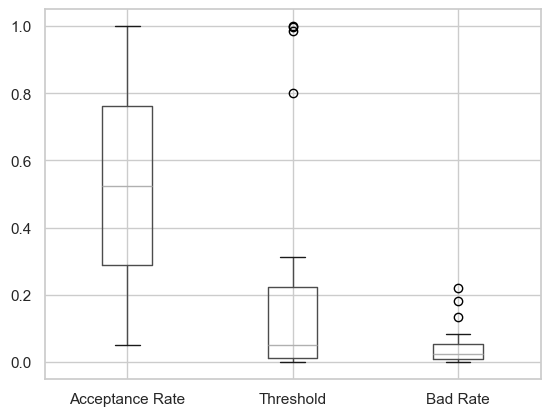

In [ ]:
# Visualize the distributions in the strategy table with a boxplot
strat_df[["Acceptance Rate", "Threshold" , "Bad Rate"]].boxplot()
plt.show()

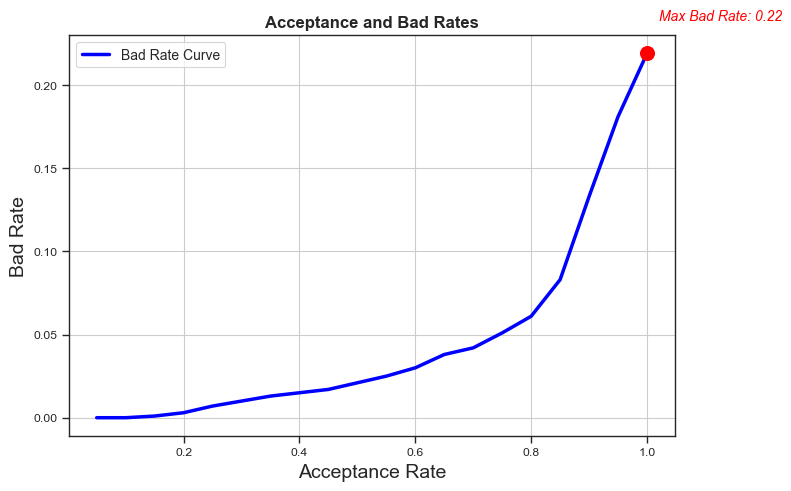

In [ ]:
# Set Seaborn style for a more attractive and clean plot
sns.set(style="ticks", context="paper")

# Find the index of the maximum Bad Rate
max_bad_rate_index = strat_df['Bad Rate'].idxmax()

# Get the maximum Bad Rate and corresponding Acceptance Rate
max_bad_rate = strat_df['Bad Rate'][max_bad_rate_index]
max_acceptance_rate = strat_df['Acceptance Rate'][max_bad_rate_index]

# Create the plot using Seaborn's lineplot function for better aesthetics
plt.figure(figsize=(8, 5))
sns.lineplot(x=strat_df['Acceptance Rate'], y=strat_df['Bad Rate'], linewidth=2.5, label="Bad Rate Curve", color='blue')

# Add the maximum bad rate point to the plot
plt.scatter(max_acceptance_rate, max_bad_rate, color='red', s=100, zorder=5)  # Red point for max bad rate
plt.text(max_acceptance_rate + 0.02, max_bad_rate + 0.02, f'Max Bad Rate: {max_bad_rate:.2f}',  color='red', fontsize=10,  style='italic')

# Add labels for the axes
plt.xlabel('Acceptance Rate', fontsize=14)
plt.ylabel('Bad Rate', fontsize=14)

# Set the title of the plot
plt.title('Acceptance and Bad Rates', fontsize=12, weight='bold')

# Add a grid for better readability
plt.grid(True)

# Display the legend with a better placement and fontsize
plt.legend(loc='best', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid any overlap
plt.show()

In [ ]:
# Print the row with the max estimated value
strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])]

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value
3,0.85000,0.80200,0.08300,10016,9556.28394,79826927.14868


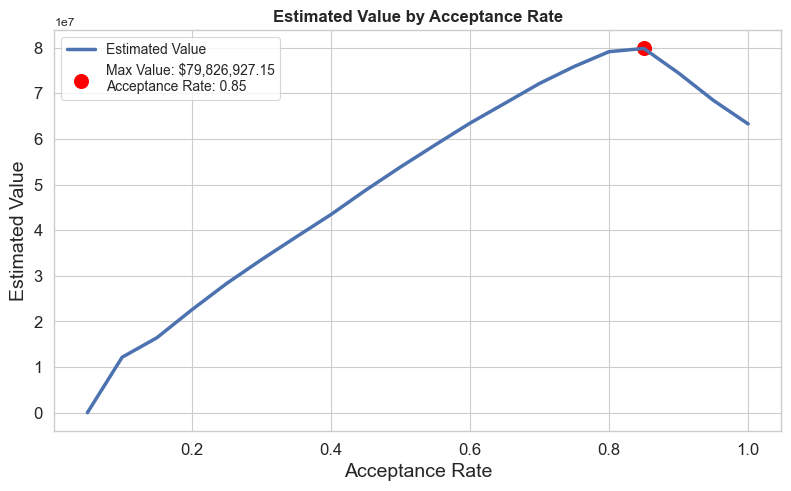

In [ ]:
# Set the Seaborn style for a cleaner and modern look
sns.set(style="whitegrid", context="paper")

# Find the index of the maximum value in 'Estimated Value'
max_index = strat_df['Estimated Value'].idxmax()

# Get the maximum value and the corresponding 'Acceptance Rate'
max_value = strat_df['Estimated Value'][max_index]
max_acceptance_rate = strat_df['Acceptance Rate'][max_index]

# Create the plot with a clean and styled appearance
plt.figure(figsize=(8, 5))
sns.lineplot(x=strat_df['Acceptance Rate'], y=strat_df['Estimated Value'], linewidth=2.5, label="Estimated Value")

# Format the max value to display with a dollar sign
max_value_formatted = f"${max_value:,.2f}"

# Add the maximum point to the plot and label it with the dollar sign format
plt.scatter(max_acceptance_rate, max_value, color='red', s=100, label=f'Max Value: {max_value_formatted}\nAcceptance Rate: {max_acceptance_rate:.2f}')

# Set plot titles and labels
plt.title('Estimated Value by Acceptance Rate', fontsize=12, weight='bold')
plt.xlabel('Acceptance Rate', fontsize=14)
plt.ylabel('Estimated Value', fontsize=14)

# Customize the legend and tick sizes
plt.legend(loc='best', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

## Total Expected Loss

![image.png](attachment:da45b48f-8e1c-467d-bc04-66187993170d.png)

In [ ]:
true_and_pred_df

,true_loan_status,prob_default,pred_loan_status
0,1,0.99344,1
1,1,0.93285,1
2,0,0.00079,1
3,0,0.00174,1
4,1,0.07366,1
...,...,...,...
11779,0,0.00091,1
11780,0,0.01920,1
11781,0,0.04464,1
11782,0,0.19534,1


In [ ]:
pd.DataFrame(X_test["loan_amnt"])

,loan_amnt
31622,15000
24935,11200
15342,15000
3460,10800
16424,3000
...,...
25231,8000
30380,6600
29849,16000
1780,6000


In [ ]:
test_pred_df = pd.concat([true_and_pred_df, pd.DataFrame(X_test["loan_amnt"]).reset_index(drop = True)], axis = 1)
test_pred_df

,true_loan_status,prob_default,pred_loan_status,loan_amnt
0,1,0.99344,1,15000
1,1,0.93285,1,11200
2,0,0.00079,1,15000
3,0,0.00174,1,10800
4,1,0.07366,1,3000
...,...,...,...,...
11779,0,0.00091,1,8000
11780,0,0.01920,1,6600
11781,0,0.04464,1,16000
11782,0,0.19534,1,6000


In [ ]:
# Probability of default (PD)
test_pred_df['prob_default']

# Exposure at default = loan amount (EAD)
test_pred_df['loan_amnt']

# Loss given default = 1.0 for total loss (LGD)
loss_given_default = 1

In [ ]:
# Calculate the bank's expected loss and assign it to a new column
test_pred_df["expected_loss"] = test_pred_df["prob_default"] * test_pred_df["loan_amnt"] * loss_given_default
test_pred_df

,true_loan_status,prob_default,pred_loan_status,loan_amnt,expected_loss
0,1,0.99344,1,15000,14901.53790
1,1,0.93285,1,11200,10447.97010
2,0,0.00079,1,15000,11.85619
3,0,0.00174,1,10800,18.77998
4,1,0.07366,1,3000,220.98005
...,...,...,...,...,...
11779,0,0.00091,1,8000,7.25237
11780,0,0.01920,1,6600,126.70489
11781,0,0.04464,1,16000,714.24437
11782,0,0.19534,1,6000,1172.05310


In [ ]:
# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']), 2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $26,823,482.06


## Model Selected and Save

In [ ]:
model = xgb_clf

with open("models/credit_risk_model.pkl", "wb") as f:
    pickle.dump(model, f)

print(f"Modelo salvo com sucesso em: models")

Modelo salvo com sucesso em: models


### Notes:

**LGD (Loss Given Default)** represents the expected loss in the event of a default on a loan or credit. It is expressed as a percentage of the exposure to risk that will not be recovered after the default. LGD is an important measure used in credit risk models, such as RWA (Risk-Weighted Assets), because it directly impacts the estimation of losses in default situations.

Understanding LGD:

**LGD = 1** means that in the event of default, 100% of the exposure to risk will be lost, meaning no recovery of the owed amount will occur. This implies that the entire value of the loan will be lost, with no chance of recovery.

The value of LGD varies depending on the situation, the type of asset, collateral, and the recovery policy after default. LGD = 1 typically indicates a situation where there are no guarantees or mechanisms to recover part of the loaned amount (i.e., the lender is unable to recover anything after default).

**Risk-weighted asset (also referred to as RWA) is a bank's assets or off-balance-sheet exposures, weighted according to risk.**